# Problem Statement :

## Considering the Closing Stock Prices of the following Tesla Stock Prices dataset, create a Neural Network model to forecast the future stock prices of Tesla

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('../input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


## Using only the Closing Price

In [4]:
dataframe = data[['Close']]
dataframe.values

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [255.729996],
       [262.049988],
       [261.5     ]])

In [5]:
dataframe.shape

(1692, 1)

## Plotting the Data

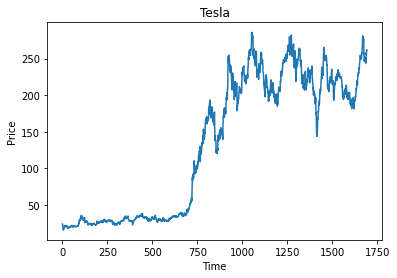

In [6]:
plt.plot(dataframe)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Tesla')
plt.show()

In [7]:
# Converting all the values into 'Floating Point Values', so that we don't miss any values due to rounding off

dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[ 23.89],
       [ 23.83],
       [ 21.96],
       ...,
       [255.73],
       [262.05],
       [261.5 ]], dtype=float32)

## Feature Scaling : Normalization

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Train - Test Split

In [9]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Preparing the dataset

In [10]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [11]:
seq_size = 10 # Number of time steps to look back 

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [12]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((1105, 10), (1105,)), ((565, 10), (565,)))

In [13]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

In [14]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((1105, 10, 1), (1105,)), ((565, 10, 1), (565,)))

## Creating the model using RNN(LSTM)

In [15]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_size, 1)),
    Dropout((0.1)),
    LSTM(64, return_sequences=True),
    Dropout((0.1)),
    LSTM(32),
    Dropout((0.1)),
    Dense(1)
]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [17]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
35/35 - 7s - loss: 0.0298 - val_loss: 0.0023
Epoch 2/100
35/35 - 1s - loss: 0.0024 - val_loss: 0.0021
Epoch 3/100
35/35 - 1s - loss: 0.0021 - val_loss: 0.0021
Epoch 4/100
35/35 - 1s - loss: 0.0021 - val_loss: 0.0021
Epoch 5/100
35/35 - 1s - loss: 0.0017 - val_loss: 0.0027
Epoch 6/100
35/35 - 1s - loss: 0.0019 - val_loss: 0.0021
Epoch 7/100
35/35 - 1s - loss: 0.0018 - val_loss: 0.0023
Epoch 8/100
35/35 - 1s - loss: 0.0018 - val_loss: 0.0023
Epoch 9/100
35/35 - 1s - loss: 0.0018 - val_loss: 0.0032
Epoch 10/100
35/35 - 1s - loss: 0.0020 - val_loss: 0.0029
Epoch 11/100
35/35 - 1s - loss: 0.0020 - val_loss: 0.0039
Epoch 12/100
35/35 - 1s - loss: 0.0016 - val_loss: 0.0021
Epoch 13/100
35/35 - 1s - loss: 0.0019 - val_loss: 0.0019
Epoch 14/100
35/35 - 1s - loss: 0.0019 - val_loss: 0.0036
Epoch 15/100
35/35 - 1s - loss: 0.0022 - val_loss: 0.0031
Epoch 16/100
35/35 - 1s - loss: 0.0020 - val_loss: 0.0023
Epoch 17/100
35/35 - 1s - loss: 0.0018 - val_loss: 0.0019
Epoch 18/100
35/35 - 1s

## Predictions

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Since we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [19]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print(f'Train Score: {trainScore} RMSE')

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print(f'Test Score: {testScore} RMSE')

Train Score: 7.006817713880873 RMSE
Test Score: 11.912846806353793 RMSE
